<a href="https://colab.research.google.com/github/SahilSunda/ML_Project/blob/master/CNN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import merge
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import PReLU
from keras.layers import Convolution2D, Convolution1D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
import itertools
import os
import time
start=time.time()
import shutil
import random
import glob
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%pylab inline
import pandas as pd

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%cd /content/drive/MyDrive/Colab Notebooks/leaf-classification/
directory_root = '/content/drive/MyDrive/Colab Notebooks/leaf-classification'


Populating the interactive namespace from numpy and matplotlib
/content/drive/MyDrive/Colab Notebooks/leaf-classification


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [45]:
parent_data = pd.read_csv(directory_root+'/train.csv')
data = parent_data.copy()   
data.pop('id')

0         1
1         2
2         3
3         5
4         6
       ... 
985    1575
986    1578
987    1581
988    1582
989    1584
Name: id, Length: 990, dtype: int64

In [46]:
test = pd.read_csv(directory_root+'/test.csv')
testId = test.pop('id')

In [47]:
species_label = data.pop('species')
species_label = LabelEncoder().fit(species_label).transform(species_label)
print(species_label.shape)

(990,)


In [48]:
one_hot = to_categorical(species_label)
print(one_hot.shape)

(990, 99)


In [49]:
preprocessed_train_data = preprocessing.MinMaxScaler().fit(data).transform(data)
preprocessed_train_data = StandardScaler().fit(data).transform(data)
print(preprocessed_train_data.shape)

test = preprocessing.MinMaxScaler().fit(test).transform(test)
test = StandardScaler().fit(test).transform(test)

(990, 192)


In [50]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2,random_state=12345)
train_index, val_index = next(iter(sss.split(preprocessed_train_data, one_hot)))

x_train, x_val = preprocessed_train_data[train_index], preprocessed_train_data[val_index]
y_train, y_val = one_hot[train_index], one_hot[val_index]

print("x_train dim: ",x_train.shape)
print("x_val dim:   ",x_val.shape)

x_train dim:  (792, 192)
x_val dim:    (198, 192)


In [51]:
model = Sequential()

model.add(Dense(768,input_dim=192,  kernel_initializer='glorot_normal', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(768, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(99, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 768)               148224    
                                                                 
 dropout_2 (Dropout)         (None, 768)               0         
                                                                 
 dense_4 (Dense)             (None, 768)               590592    
                                                                 
 dropout_3 (Dropout)         (None, 768)               0         
                                                                 
 dense_5 (Dense)             (None, 99)                76131     
                                                                 
Total params: 814,947
Trainable params: 814,947
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics = ["accuracy"])
print(time.time())
early_stopping = EarlyStopping(monitor='val_loss', patience=300)

history = model.fit(x_train, y_train,batch_size=192,epochs=3000 ,verbose=1,
                    validation_data=(x_val, y_val),callbacks=[early_stopping])

1639640607.9368749
Epoch 1/3000
5/5 [==============================] - 1s 66ms/step - loss: 4.5136 - accuracy: 0.0455 - val_loss: 3.4040 - val_accuracy: 0.4798
Epoch 2/3000
5/5 [==============================] - 0s 32ms/step - loss: 3.2403 - accuracy: 0.3384 - val_loss: 2.4026 - val_accuracy: 0.7273
Epoch 3/3000
5/5 [==============================] - 0s 35ms/step - loss: 2.2487 - accuracy: 0.6111 - val_loss: 1.4817 - val_accuracy: 0.8434
Epoch 4/3000
5/5 [==============================] - 0s 38ms/step - loss: 1.4110 - accuracy: 0.7513 - val_loss: 0.7998 - val_accuracy: 0.9293
Epoch 5/3000
5/5 [==============================] - 0s 35ms/step - loss: 0.8435 - accuracy: 0.8649 - val_loss: 0.4261 - val_accuracy: 0.9848
Epoch 6/3000
5/5 [==============================] - 0s 33ms/step - loss: 0.5067 - accuracy: 0.9116 - val_loss: 0.2969 - val_accuracy: 0.9545
Epoch 7/3000
5/5 [==============================] - 0s 32ms/step - loss: 0.4058 - accuracy: 0.9192 - val_loss: 0.2144 - val_accuracy: 0

In [53]:
print('val_acc: ',max(history.history['val_accuracy']))
print('val_loss: ',min(history.history['val_loss']))
print('train_acc: ',max(history.history['accuracy']))
print('train_loss: ',min(history.history['loss']))
print("train/val loss ratio: ", min(history.history['loss'])/min(history.history['val_loss']))

val_acc:  1.0
val_loss:  0.0007626679143868387
train_acc:  1.0
train_loss:  7.234916665765923e-07
train/val loss ratio:  0.0009486326262437002


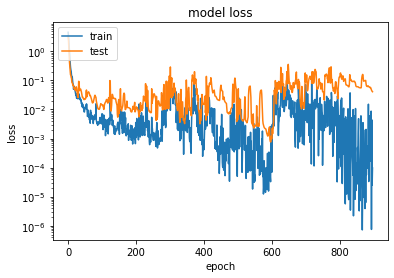

<Figure size 432x288 with 0 Axes>

In [54]:
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

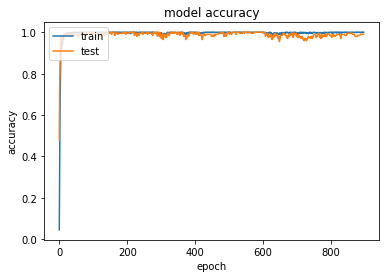

<Figure size 432x288 with 0 Axes>

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')